In [67]:
# what are actual good arms
# id: total rewards
sum_rewards = {}
for record in r.itertuples():
    sum_rewards[record.id] = sum_rewards.get(record.id, 0) + record.clicked
sum_rewards

{'id-552077': 47,
 'id-555224': 1973,
 'id-555528': 1014,
 'id-559744': 80,
 'id-559833': 886,
 'id-559855': 1232,
 'id-560290': 1119,
 'id-560518': 550,
 'id-560620': 143,
 'id-560805': 1879,
 'id-562265': 640,
 'id-562374': 937,
 'id-562637': 491,
 'id-563115': 2140,
 'id-563582': 1776,
 'id-563643': 2743,
 'id-563787': 21,
 'id-563846': 2730,
 'id-563938': 164,
 'id-564335': 606,
 'id-564371': 1442,
 'id-564418': 1171,
 'id-564604': 197,
 'id-565364': 457,
 'id-565479': 1608,
 'id-565515': 2438,
 'id-565533': 2066,
 'id-565561': 752,
 'id-565589': 1782,
 'id-565648': 1161,
 'id-565747': 1921,
 'id-565822': 3193,
 'id-565930': 1259,
 'id-565980': 44,
 'id-566013': 1061,
 'id-566022': 964,
 'id-566092': 493,
 'id-566431': 2409,
 'id-566439': 285,
 'id-566478': 1438,
 'id-566541': 574,
 'id-566573': 859,
 'id-566587': 2261,
 'id-566602': 700,
 'id-566631': 494,
 'id-566689': 748,
 'id-566726': 694,
 'id-566825': 568,
 'id-566838': 412}

In [69]:
# id:average rewards
goodness={}
for g in sum_rewards:
    goodness[g] = sum_rewards[g] / (lives[g][1] - lives[g][0])
goodness

{'id-552077': 0.022296015180265655,
 'id-555224': 0.026303860921501707,
 'id-555528': 0.01373834814654238,
 'id-559744': 0.03322259136212625,
 'id-559833': 0.03938828131946297,
 'id-559855': 0.01669195751138088,
 'id-560290': 0.015160958161716887,
 'id-560518': 0.008447502611046261,
 'id-560620': 0.01831454918032787,
 'id-560805': 0.05495116102240159,
 'id-562265': 0.02091913447081127,
 'id-562374': 0.04339168287487265,
 'id-562637': 0.029768400630532314,
 'id-563115': 0.03114630028526518,
 'id-563582': 0.02518863107732456,
 'id-563643': 0.03174658287327986,
 'id-563787': 0.00872093023255814,
 'id-563846': 0.03159612513454394,
 'id-563938': 0.02729693741677763,
 'id-564335': 0.010464875319472267,
 'id-564371': 0.04578649901568553,
 'id-564418': 0.013552770158443573,
 'id-564604': 0.02623867874267448,
 'id-565364': 0.020578170028818444,
 'id-565479': 0.022903372835004557,
 'id-565515': 0.032897932746801965,
 'id-565533': 0.029426845943482223,
 'id-565561': 0.02054195804195804,
 'id-5655

In [84]:
sorted(
    filter(
        lambda g:1317514504>=lives[g[0]][0] and 1317514504<=lives[g[0]][1],
        goodness.items()), key=lambda x:x[1])

[('id-560518', 0.008447502611046261),
 ('id-563787', 0.00872093023255814),
 ('id-564335', 0.010464875319472267),
 ('id-564418', 0.013552770158443573),
 ('id-555528', 0.01373834814654238),
 ('id-560290', 0.015160958161716887),
 ('id-565648', 0.015794199270827664),
 ('id-559855', 0.01669195751138088),
 ('id-560620', 0.01831454918032787),
 ('id-565561', 0.02054195804195804),
 ('id-565364', 0.020578170028818444),
 ('id-552077', 0.022296015180265655),
 ('id-565479', 0.022903372835004557),
 ('id-563582', 0.02518863107732456),
 ('id-564604', 0.02623867874267448),
 ('id-555224', 0.026303860921501707),
 ('id-563938', 0.02729693741677763),
 ('id-565589', 0.02775355095938201),
 ('id-565533', 0.029426845943482223),
 ('id-563115', 0.03114630028526518),
 ('id-563846', 0.03159612513454394),
 ('id-563643', 0.03174658287327986),
 ('id-565515', 0.032897932746801965),
 ('id-559744', 0.03322259136212625),
 ('id-565747', 0.03369702497895032),
 ('id-565822', 0.03695473536798491)]

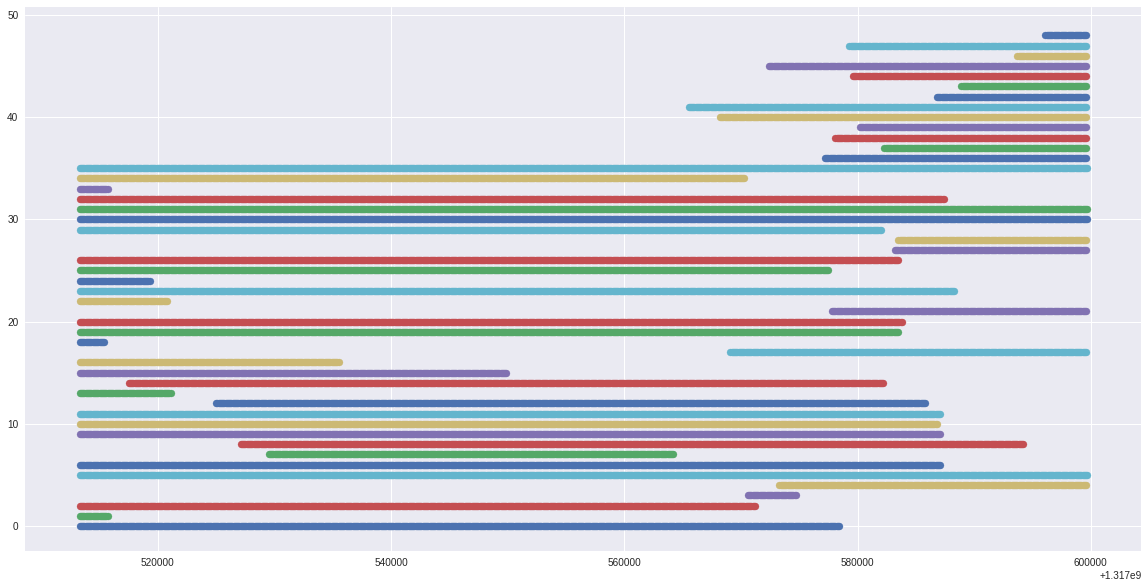

In [31]:
# rank all arms by their "goodness" (y axis is goodness ranking)
# observe their living timestamp(x axis is timestamp)
# the higher the position of the bar, the better average reward it has
# the optimal recommender should pick the highest bar available at each timestamp
plt.figure(figsize=(20,10))
for i,g in enumerate(sorted(goodness.items(), key= lambda g:g[1], reverse=False)):
    id = g[0]
    l = np.arange(lives[id][0], lives[id][1], 100) # points lie within lifespan
    plt.scatter(l, [i]*len(l))
pass

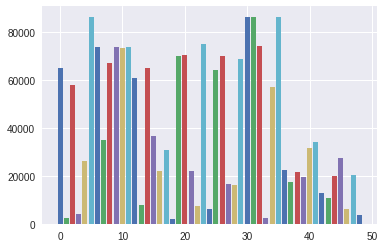

In [85]:
for i,g in enumerate(sorted(goodness.items(), key= lambda g:g[1], reverse=False)):
  plt.bar(i, lives[g[0]][1] - lives[g[0]][0])

In [0]:
def best_available(time):
    return max(
      filter(
          lambda g:time in range(lives[g[0]][0], lives[g[0]][1]+1), goodness.items()
      ), 
      key=lambda g:g[1]
    )[0]

r['best'] = r.timestamp.apply(best_available)

In [10]:
r.head()

,timestamp,id,clicked,best
0,1317513291,id-560620,0,id-565822
1,1317513291,id-565648,0,id-565822
2,1317513291,id-563115,0,id-565822
3,1317513292,id-552077,0,id-565822
4,1317513292,id-564335,0,id-565822


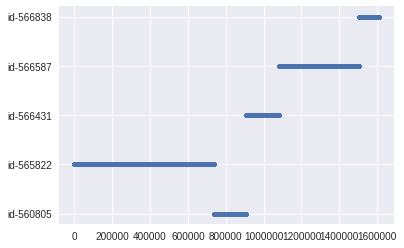

In [72]:
# at each record the optimal recommender should pick:
plt.scatter(range(len(r)), r.best, marker='.')

In [39]:
c = r.groupby(['timestamp','clicked'], as_index=False).agg(lambda g:' '.join(g))
c.head()

,timestamp,clicked,id
0,1317513291,0,id-560620 id-565648 id-563115
1,1317513292,0,id-552077 id-564335 id-565589 id-565589
2,1317513293,0,id-560290 id-563643 id-563938 id-563115 id-560...
3,1317513293,1,id-563938 id-564335
4,1317513294,0,id-565822 id-552077 id-565364 id-565364 id-563...


In [44]:
should_pick = c[c.clicked==1]
should_pick.head()

,timestamp,clicked,id
3,1317513293,1,id-563938 id-564335
6,1317513295,1,id-564335
11,1317513299,1,id-565747
13,1317513300,1,id-563115
15,1317513301,1,id-565533


In [347]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import time

import seaborn as sns

from functools import lru_cache
from collections import Counter, defaultdict, OrderedDict, namedtuple
import random
import copy
import bisect

In [2]:
import warnings
warnings.filterwarnings('default')

In [4]:
records = pd.read_csv('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002',
           sep=' ',
           names=['timestamp','id','clicked'],
           usecols=[0,1,2],
           )
records.head()

,timestamp,id,clicked
0,1317513291,id-560620,0
1,1317513291,id-565648,0
2,1317513291,id-563115,0
3,1317513292,id-552077,0
4,1317513292,id-564335,0


In [6]:
# parser that watches article lifespans
lifespans = {}
with open('Webscope_R6B/ydata-fp-td-clicks-v2_0.20111002') as f:
    for line in f.readlines():
        timestamp = int(line[:10])
        components = line.strip().split(' |')
        for article in components[2:]:
            if article in lifespans:
                lifespans[article][1] = timestamp
            else:
                lifespans[article] = [timestamp, timestamp]

In [385]:
class Arm:
    def __init__(self,lifespan):
        self.birth, self.death = lifespan
        self.T = 0
        self.rewards = 0
    def __eq__(self, val):
        return self.id == val
    def __repr__(self):
        return '{}/{} lifespan: {}'.format(self.rewards, self.T, (self.birth, self.death))
pool = {}
for k in lifespans:
    pool[k] = Arm(lifespans[k])

In [386]:
pool

{'id-552077': 0/0 lifespan: (1317513291, 1317515399),
 'id-555224': 0/0 lifespan: (1317513291, 1317588299),
 'id-555528': 0/0 lifespan: (1317513291, 1317587099),
 'id-559744': 0/0 lifespan: (1317513291, 1317515699),
 'id-559833': 0/0 lifespan: (1317577200, 1317599694),
 'id-559855': 0/0 lifespan: (1317513291, 1317587099),
 'id-560290': 0/0 lifespan: (1317513291, 1317587099),
 'id-560518': 0/0 lifespan: (1317513291, 1317578399),
 'id-560620': 0/0 lifespan: (1317513291, 1317521099),
 'id-560805': 0/0 lifespan: (1317565500, 1317599694),
 'id-562265': 0/0 lifespan: (1317569100, 1317599694),
 'id-562374': 0/0 lifespan: (1317578100, 1317599694),
 'id-562637': 0/0 lifespan: (1317583200, 1317599694),
 'id-563115': 0/0 lifespan: (1317513291, 1317581999),
 'id-563582': 0/0 lifespan: (1317513291, 1317583799),
 'id-563643': 0/0 lifespan: (1317513291, 1317599694),
 'id-563787': 0/0 lifespan: (1317513291, 1317515699),
 'id-563846': 0/0 lifespan: (1317513291, 1317599694),
 'id-563938': 0/0 lifespan: 

In [387]:
class AG_L:
    def __init__(self, records, pool):
        self.records = records.itertuples()
        self.rewards = 0
        self.pool = copy.deepcopy(pool) # unordered dict of arms
        self.ids = sorted(pool, key=lambda k:pool[k].death, reverse=True) # arm ids sorted by death time
        self.n_exploit = 0
        
    def update(self, record):
        self.rewards += record.clicked
        self.pool[record.id].rewards += record.clicked
        self.pool[record.id].T += 1
        
    def initialize(self, m):
        for i in range(m):
            record = next(self.records) # raise StopIteration
            if not pool[record.id].T: # not played
                self.update(record)
    
    def play(self, n, threshold=.3):
        for i in range(n):
            while True: # keep trying
                record = next(self.records) # raise StopIteration
                self.time = record.timestamp
                best = max(self.pool.items(), key=lambda i: i[1].rewards/i[1].T if i[1].T>0 else -1)
                if random.random() < best[1].rewards/best[1].T: #exploit
                    pick = best[0]
                    #print(pick)
                    exploited = 1
                else: #explore
                    born = list(filter(lambda arm: self.pool[arm].birth<=self.time<=self.pool[arm].death, self.ids))
                    pick = random.choice(born[:int(threshold*len(born))]) # randomly choose one from young born arms
                    exploited = 0
                if pick == record.id:
                    if exploited:
                        self.n_exploit += 1
                    self.update(record)
                    break

In [388]:
%%time
agl = AG_L(records, pool)
agl.initialize(25)
agl.play(975,.1)

CPU times: user 1.02 s, sys: 66.6 ms, total: 1.08 s
Wall time: 1.08 s


In [373]:
agl.time

1317516892

In [380]:
agl.n_exploit

0

In [381]:
agl.time

1317514509

In [382]:
pool

{'id-552077': 0/1 lifespan: (1317513291, 1317515399),
 'id-555224': 0/0 lifespan: (1317513291, 1317588299),
 'id-555528': 0/1 lifespan: (1317513291, 1317587099),
 'id-559744': 0/0 lifespan: (1317513291, 1317515699),
 'id-559833': 0/0 lifespan: (1317577200, 1317599694),
 'id-559855': 0/0 lifespan: (1317513291, 1317587099),
 'id-560290': 0/1 lifespan: (1317513291, 1317587099),
 'id-560518': 0/0 lifespan: (1317513291, 1317578399),
 'id-560620': 0/1 lifespan: (1317513291, 1317521099),
 'id-560805': 0/0 lifespan: (1317565500, 1317599694),
 'id-562265': 0/0 lifespan: (1317569100, 1317599694),
 'id-562374': 0/0 lifespan: (1317578100, 1317599694),
 'id-562637': 0/0 lifespan: (1317583200, 1317599694),
 'id-563115': 0/1 lifespan: (1317513291, 1317581999),
 'id-563582': 0/0 lifespan: (1317513291, 1317583799),
 'id-563643': 32/490 lifespan: (1317513291, 1317599694),
 'id-563787': 0/1 lifespan: (1317513291, 1317515699),
 'id-563846': 25/486 lifespan: (1317513291, 1317599694),
 'id-563938': 1/1 life

In [374]:
agl.pool

{'id-552077': 46/2070 lifespan: (1317513291, 1317515399),
 'id-555224': 926/20943 lifespan: (1317513291, 1317588299),
 'id-555528': 245/14741 lifespan: (1317513291, 1317587099),
 'id-559744': 100/2448 lifespan: (1317513291, 1317515699),
 'id-559833': 0/0 lifespan: (1317577200, 1317599694),
 'id-559855': 88/3920 lifespan: (1317513291, 1317587099),
 'id-560290': 84/3937 lifespan: (1317513291, 1317587099),
 'id-560518': 36/4032 lifespan: (1317513291, 1317578399),
 'id-560620': 103/4000 lifespan: (1317513291, 1317521099),
 'id-560805': 0/0 lifespan: (1317565500, 1317599694),
 'id-562265': 0/0 lifespan: (1317569100, 1317599694),
 'id-562374': 0/0 lifespan: (1317578100, 1317599694),
 'id-562637': 0/0 lifespan: (1317583200, 1317599694),
 'id-563115': 194/3901 lifespan: (1317513291, 1317581999),
 'id-563582': 139/3946 lifespan: (1317513291, 1317583799),
 'id-563643': 1752/33746 lifespan: (1317513291, 1317599694),
 'id-563787': 20/2252 lifespan: (1317513291, 1317515699),
 'id-563846': 1686/3332

In [367]:
agl.n_exploit

0

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


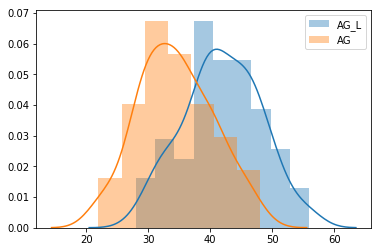

In [334]:
hist_agl = []
hist_ag = []
for i in range(1, 101):
    agl = AG_L(records, pool)
    agl.initialize(25)
    agl.play(975)
    hist_agl.append(agl.rewards)
    agl = AG_L(records, pool)
    agl.initialize(25)
    agl.play(975, 1)
    hist_ag.append(agl.rewards)
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(hist_agl, label='AG_L')
sns.distplot(hist_ag, label='AG')
plt.legend()
pass

In [0]:
# offline simulation for UCB_L
def UCB_L(n=1000, c=.005, m=25, r=1, records=records, lives=lives, verbose=True, mode=True):
    # records should be long enough
    '''
    n: number of turns to play
    m: number of turns to initialize
    k: adjust desire to exploit/explore
    mode: whether the modification is active or not
    '''
    def ucb(x):
        # r: ratio between paces of timestamp and turns
        time = records[i]['timestamp']
        article = x[0]
        acc_reward, T = x[1]
        die = lives[article][1]
        s = S.get(article, t)
        if mode:
            return acc_reward/T + c*np.log(r*(die-time)+1) * np.sqrt(2*np.log(t-s+1) / T)
        else:
            return acc_reward/T + np.sqrt(2*np.log(t-s+1)/T)
        
    rewards = 0
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    S = {} # records the first turn an arm is played
    # initialization
    while t<=m:
        displayed = records[i]['displayed']
        clicked = records[i]['clicked']
        if displayed not in X.keys():
            S[displayed] = t
            X[displayed] = np.array([clicked, 1])
            t += 1
        i += 1
    
    while t<=n:
        while i<len(records):
            fake = False
            displayed = records[i]['displayed']
            clicked = records[i]['clicked']
            
            if displayed not in X.keys(): # use previous mean as an estimation for an unseen arm
                fake = True
                estimation = sum(map(lambda x:x[0]/x[1], X.values())) / len(X) 
                X[displayed] = np.array([estimation, 1])
                            
            best = max(X.items(), key= ucb)
            
            if fake:
                X.pop(displayed)

            if displayed == best[0]:
                rewards += clicked
                if displayed not in S.keys(): # the first time an arm is played
                    S[displayed] = t
                X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
                break
            i += 1
            
        if i>=len(records):
            print('running out of records')
            return
        
        if verbose:       
            if i%1000==0:
                print(t,i)
            
        t += 1
        i += 1
    if verbose:
        print('# X', len(X.keys()))
        print('# records', i)
        return rewards, X
    return rewards

In [0]:
# test version 3
# filter young arms before choosing best score
def UCB_L3(n=1000, c=.0005, m=25, p=2, life_threshold=.3, reward_rate=1, records=records, lives=lives, verbose=False, mode=True):
  
    def get_young_arms():
        time = records[i]['timestamp']
        born = filter(lambda x: x[1][0]<time, lives.items()) # fileter out unborn articles from lives
        life_rank = sorted(born, key= lambda x: x[1][1], reverse= True) # sort born articles by their expiring date
        young = life_rank[ : int(len(life_rank)*life_threshold)] # articles among top $life_threshold$% on the life ranking
        return list(zip(*young))[0]
    def ucb(x):
        time = records[i]['timestamp']
        article = x[0]
        acc_reward, T = x[1]
        birth_time, death_time = lives[article]
        if article not in S.keys():
            S[article] = t
        s = S[article]
        if mode:
            life_left = life_est[article] - t + s
            life_spent = t-s

            estimation = acc_reward/T
            life_regulation = c*np.log(life_left+1)
            potential = np.sqrt(p* np.log(life_spent) / T)

            return estimation + life_regulation * potential
        else:
            return acc_reward/T + np.sqrt(p*np.log(t-s)/T)
        
    rewards = 0
    #rewards_log = [0]
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    S = {} # records the first turn an arm is played
    # initialization
    while t<=m:
        displayed = records[i]['displayed']
        clicked = records[i]['clicked'] * reward_rate
        if displayed not in X.keys():
            S[displayed] = t
            X[displayed] = np.array([clicked, 1])
            if t==1:
                starting_time = records[i]['timestamp']
            t += 1
        i += 1
    
    regrets = 0
    while t<=n:
        rec_used = 0
        while True:
            displayed = records[i]['displayed']
            clicked = records[i]['clicked'] * reward_rate
                
            # initialize all uninitialized arms in the pool with mean of past arms
            tmp = {}
            for article in records[i]['pool']:
                article = article[1:] # items in pool begins with a '|'
                estimation = sum(map(lambda x:x[0]/x[1], X.values())) / len(X) 
                if article not in X.keys():
                    tmp[article] = np.array([estimation, 1])
            
            best = max(# find best among
                filter(# young arms within initialized and uninitialized arms
                    lambda item:item[0] in get_young_arms(),
                    (*X.items(), *tmp.items())
                ),
                key= ucb
            )
            
            if displayed == best[0]:
                rewards += clicked
                if displayed not in S.keys(): # the first turn an arm is played
                    S[displayed] = t
                X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
                break
            
            i += 1
            rec_used += 1
    
        t += 1
        i += 1
        #rewards_log.append(rewards)
    #print('regrets',regrets)
    return rewards/reward_rate

In [0]:
life_est = {}
life_length = {}

In [0]:
# test version
def UCB_L2(n=1000, c=.0005, m=25, p=2, reward_rate=1, records=records, lives=lives, verbose=False, mode=True):
    def ucb(x):
        time = records[i]['timestamp']
        article = x[0]
        acc_reward, T = x[1]
        birth_time, death_time = lives[article]
        if article not in S.keys():
            S[article] = t
        s = S[article]
        if mode:
          
            life_left = life_est[article] - t + s
            life_spent = t-s
            
            '''# dynamic ratio from turn to timestamp
            try:
                turn2time = (t-1)/(time-starting_time)
            except ZeroDivisionError:
                turn2time = t-1
            # unborn or dead arms
            if death_time < time or time <= birth_time:
                return 0
            life_left = (death_time - time) * turn2time
            life_spent = (time - birth_time) * turn2time
            # trace estimated life length(in turns)
            if article not in life_length:
                life_length[article] = []
            else:
                life_length[article].append(life_left + life_spent)'''
            
            
            estimation = acc_reward/T
            life_regulation = c*np.log(life_left+1)
            potential = np.sqrt(p* np.log(life_spent) / T)
                      
            '''if verbose:
                print(article, estimation, life_regulation* potential, life_regulation*potential/estimation)'''
                
            return estimation + life_regulation * potential
        else:
            return acc_reward/T + np.sqrt(p*np.log(t-s)/T)
        
    rewards = 0
    #rewards_log = [0]
    i = 0 # marker in records
    X = {} # dict of expectations article_id : array([sum, n_observations])
    t = 1 # number of turn taken
    S = {} # records the first turn an arm is played
    # initialization
    while t<=m:
        displayed = records[i]['displayed']
        clicked = records[i]['clicked'] * reward_rate
        if displayed not in X.keys():
            S[displayed] = t
            X[displayed] = np.array([clicked, 1])
            if t==1:
                starting_time = records[i]['timestamp']
            t += 1
        i += 1
    
    regrets = 0
    log = []
    while t<=n:
        #rec_used = 0
        while True:
            displayed = records[i]['displayed']
            clicked = records[i]['clicked'] * reward_rate
                
            # initialize all uninitialized arms in the pool with mean of past arms
            tmp = {}
            for article in records[i]['pool']:
                article = article[1:] # items in pool begins with a '|'
                estimation = sum(map(lambda x:x[0]/x[1], X.values())) / len(X) 
                if article not in X.keys():
                    tmp[article] = np.array([estimation, 1])
            
            best = max(
                (*X.items(), *tmp.items()),
                key= ucb
            )
            
            if displayed == best[0]:
                log.append((displayed, clicked))

                rewards += clicked
                if displayed not in S.keys(): # the first turn an arm is played
                    S[displayed] = t
                X[displayed] = X.get(displayed, np.array([0, 0])) + np.array([clicked, 1])
                break
              
            
            i += 1
            #rec_used += 1
    
        t += 1
        i += 1
        #rewards_log.append(rewards)
    #print('regrets',regrets)
    res = {'X':X,'rewards':rewards/reward_rate,'t':t,'i':i}

    return res, log

In [33]:
# only remaining life matters
UCB_L2(c=1,reward_rate=.00000000001)['rewards']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


32.00000000000001

In [32]:
# only current expectation matters
UCB_L2(c=1,reward_rate=1000000000)['rewards']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


31.0

In [57]:
res_ucb2, log_ucb2 = UCB_L2()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


In [0]:
res_agl2, log_agl2 = AG_L2(n=1000, verbose=False)

In [62]:
for i in range(len(log_agl2)):
  if log_agl2[i][1] != log_ucb2[i][1]:
    print(i, log_agl2[i], log_ucb2[i])

5 ('id-563643', 1) ('id-563938', 0)
8 ('id-563643', 1) ('id-563938', 0)
67 ('id-563846', 0) ('id-555224', 1)
78 ('id-563643', 0) ('id-555224', 1)
82 ('id-563643', 1) ('id-555224', 0)
85 ('id-563643', 1) ('id-555224', 0)
106 ('id-563643', 1) ('id-555224', 0)
120 ('id-563643', 0) ('id-555224', 1)
124 ('id-563846', 0) ('id-555224', 1)
133 ('id-563643', 0) ('id-555224', 1)
150 ('id-563643', 0) ('id-555224', 1)
151 ('id-563643', 0) ('id-555224', 1)
154 ('id-563643', 0) ('id-555224', 1)
160 ('id-563643', 1) ('id-555224', 0)
165 ('id-563846', 1) ('id-555224', 0)
167 ('id-563846', 1) ('id-555224', 0)
177 ('id-563846', 0) ('id-555224', 1)
180 ('id-563846', 0) ('id-555224', 1)
192 ('id-563643', 0) ('id-555224', 1)
197 ('id-563643', 1) ('id-555224', 0)
201 ('id-563846', 0) ('id-555224', 1)
203 ('id-563643', 0) ('id-555224', 1)
233 ('id-563643', 1) ('id-555224', 0)
237 ('id-563643', 1) ('id-555224', 0)
257 ('id-563846', 1) ('id-555224', 0)
307 ('id-563846', 0) ('id-555224', 1)
329 ('id-563643', 1)

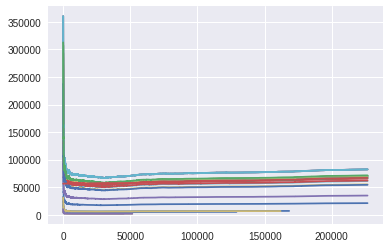

In [43]:
# the estimation for life length(in turns) should be stable
for i in life_length.values():
    plt.plot(i)

In [44]:
life_est={}
for key in life_length:
    life_est[key] = life_length[key][-1]
life_est

{'id-552077': 1693.0,
 'id-555224': 71503.95576318048,
 'id-555528': 70360.01449137191,
 'id-559744': 1984.0,
 'id-559855': 70360.01449137191,
 'id-560290': 70360.01449137191,
 'id-560518': 62066.44027075984,
 'id-560620': 7066.0,
 'id-563115': 65498.264086185525,
 'id-563582': 67214.17599389836,
 'id-563643': 82366.63142339594,
 'id-563787': 1984.0,
 'id-563846': 82366.63142339594,
 'id-563938': 5321.0,
 'id-564335': 55202.792639908475,
 'id-564418': 82366.63142339594,
 'id-564604': 6791.0,
 'id-565364': 21170.539803603773,
 'id-565479': 66928.19067594623,
 'id-565515': 70645.99980932404,
 'id-565533': 66928.19067594623,
 'id-565561': 34897.83506530651,
 'id-565589': 61208.48431690342,
 'id-565648': 70074.02917341978,
 'id-565747': 54344.836686052055,
 'id-565822': 82366.63142339594,
 'id-565930': 61771.87539326913}

In [0]:
ucbl2 = []
for i in range(100):
    ucbl2.append(UCB_L2(n=500, m=20, records=records[i*300:1000000+i*300], verbose=False))
    print(i+1,end='\r',flush=True)
    time.sleep(.0001)

In [0]:
ucbl3 = []
for i in range(100):
    ucbl3.append(UCB_L3(n=500, m=20, records=records[i*300:1000000+i*300], verbose=False))
    print(i+1,end='\r',flush=True)
    time.sleep(.0001)

In [0]:
sns.distplot(ucbl3,label='UCB_L3')
sns.distplot(ucbl2,label='UCB_L2')
sns.distplot(ucbn,label='UCB')
sns.distplot(agl,label='AG_L')
sns.distplot(ag,label='AG')
plt.legend()
pass

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
ts = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
xs = []
ys = []
for t in ts:
    xs.append( 't={}'.format(str(t)) )
    ys.append(UCB_L2(life_threshold=t,records=records, verbose=False))
plt.bar(xs, ys)

In [0]:
# the estimation for life length(in turns) should be stable
for i in life_length.values():
    plt.plot(i)

In [0]:
life_est={}
for key in life_length:
    life_est[key] = life_length[key][-1]
life_est

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c,records=records[3000:], verbose=False))
plt.bar(xs, ys)

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c,records=records[1500:], verbose=False))
plt.bar(xs, ys)

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [.0005, .001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for c in cs:
    xs.append( 'c={}'.format(str(c)) )
    ys.append(UCB_L2(c=c, verbose=False))
plt.bar(xs, ys)

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
rs = [10,50,100,200,500,1000,2000,5000,10000]
xs = []
ys = []
for r in rs:
    xs.append( 'r={}'.format(str(r)) )
    ys.append(UCB_L2(reward_rate=r, verbose=False))
plt.bar(xs, ys)

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
rs = [.001, .005, .01, .05, .1, .5, 1, 5, 20, 50, 100]
xs = []
ys = []
for r in rs:
    xs.append( 'r={}'.format(str(r)) )
    ys.append(UCB_L2(reward_rate=r, verbose=False))
plt.bar(xs, ys)

In [0]:
# use estimated life length(in turns)
plt.figure(figsize=(10,5))
cs = [5,10,20,50]
rs = [10,50,100,150]
xs = []
ys = []
for c in cs:
    for r in rs:
        xs.append( 'c{}\nr{}'.format(str(c),str(r)) )
        ys.append(UCB_L2(c=c,reward_rate=r, verbose=False))
plt.bar(xs, ys)

In [0]:
ucbl = []
ucbn = []
for i in range(100):
    ucbl.append(UCB_L(n=500, m=20, r=.8, c=0.005, records=records[i*100:1000000+i*100], verbose=False))
    ucbn.append(UCB_L(n=500, m=20, r=.8, records=records[i*100:1000000+i*100], mode=False, verbose=False))
    print(i,end='\r',flush=True)
    time.sleep(.001)
sns.distplot(ucbl,label='UCB_L')
sns.distplot(ucbn,label='UCB')
plt.legend()
pass